# Name : Mahesh Chandra Duddu

## The task is to - Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'


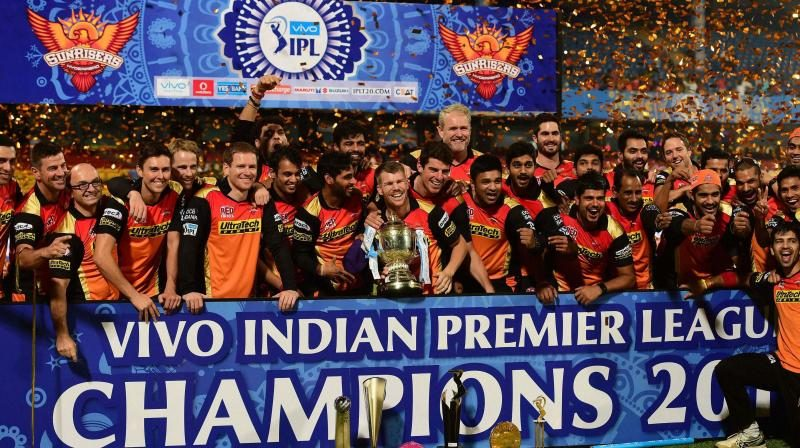

* As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.


* Suggest teams or players a company should endorse for its products.

In [109]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [110]:
#Reading Data from CSV
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [111]:
#Displaying the first 5 rows of match 
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [112]:
#Displaying first 5 rows of delivery data
delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [113]:
#Dimensions of match dataset
match.shape


(756, 18)

In [114]:
#Dimensions of delivery dataset
delivery.shape

(179078, 21)

In [115]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [116]:
#Different data types in match dataset
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [117]:
#statistical details of different columns
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [118]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [119]:
#Null values in the data
match.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [120]:
delivery.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [121]:
deliveries_seasons = delivery.merge(match["season"], left_on=delivery.index, right_on=match.index)

### Replacing both Rising Pune Supergiant and Rising Pune Supergiants with RPS 

In [122]:
#replace team names with their short forms for convenience
match.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [123]:
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

### Number of Matches Per Season 

In [124]:
matches_per_season = match['season'].value_counts().to_frame()

<AxesSubplot:title={'center':'Number of matches per IPL seasons'}>

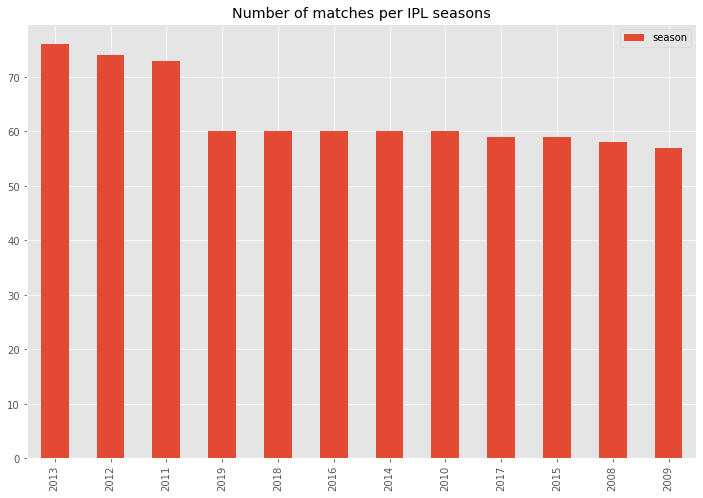

In [125]:
matches_per_season.plot(kind="bar", title="Number of matches per IPL seasons", figsize=(12,8))

### Overall Team Stats

In [126]:
overall_team_stats = pd.DataFrame({'Total Matches Played': match["team1"].value_counts() + match["team2"].value_counts(),'Toss Won': match["toss_winner"].value_counts(), 'Total Won': match["winner"].value_counts(),'Total Lost': ((match["team1"].value_counts() + match["team2"].value_counts()) - match["winner"].value_counts())})
overall_team_stats.sort_values(by="Total Won", ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost
MI,187,98,109,78
CSK,164,89,100,64
KKR,178,92,92,86
RCB,180,81,84,96
KXIP,176,81,82,94
RR,147,80,75,72
DD,161,80,67,94
SRH,108,46,58,50
DC,75,43,29,46
RPS,30,13,15,15


### IPL Trophy winners

In [127]:
season_winner = match.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
season_winner.sort_values(by="season").reset_index(drop=True)

,season,winner
0,2008,RR
1,2009,DC
2,2010,CSK
3,2011,CSK
4,2012,KKR
5,2013,MI
6,2014,KKR
7,2015,MI
8,2016,SRH
9,2017,MI


### No . of matches played at each venue

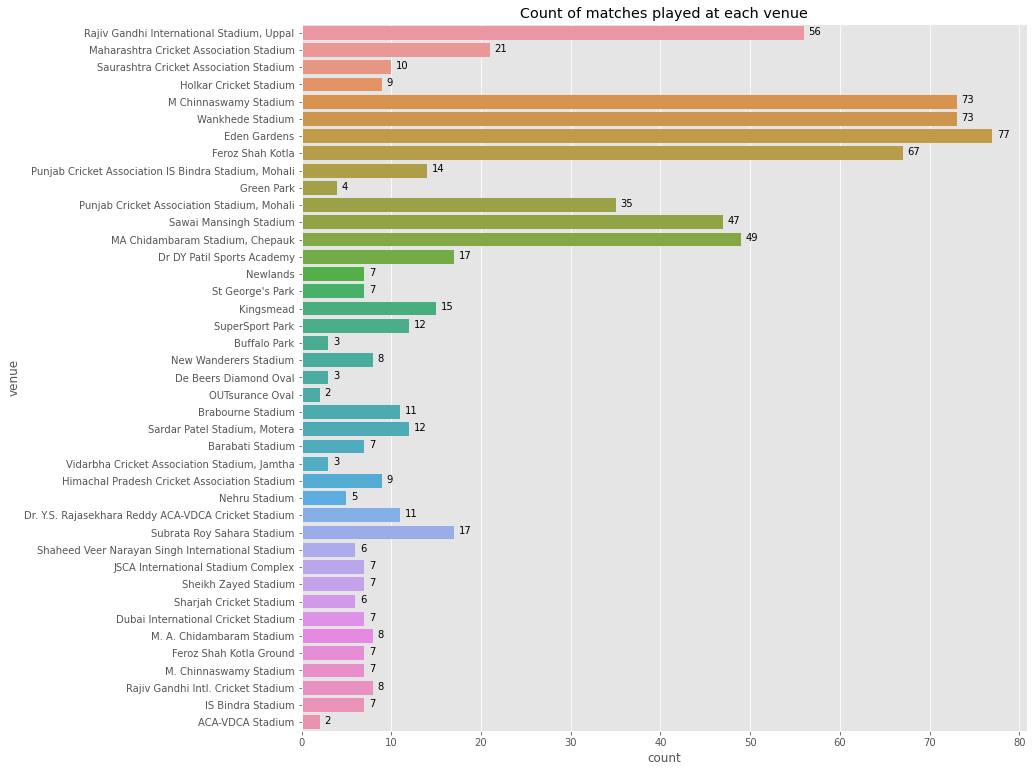

In [128]:
plt.figure(figsize=(13,13))
ax=sns.countplot(data=match,y='venue')
for p in ax.patches:
    ax.annotate(format(p.get_width()), (p.get_width()+0.5,p.get_y()+0.5, ))
plt.title('Count of matches played at each venue')
plt.show()

### Most Man of the match in IPL season(Top 15)

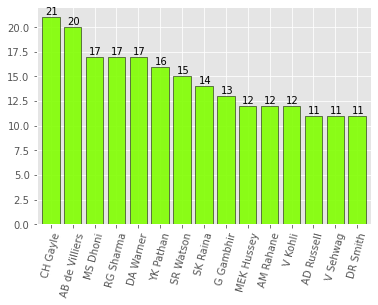

In [129]:
ax=match['player_of_match'].value_counts().head(15).plot.bar(width=0.8,color=(0.5, 1.0, 0, 0.9),edgecolor='black')
plt.xticks(rotation='75')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Most wins by an IPL team over all seasons

In [130]:
team_wins = match.winner.value_counts().to_frame()
team_wins

,winner
MI,109
CSK,100
KKR,92
RCB,84
KXIP,82
RR,75
DD,67
SRH,58
DC,29
RPS,15


<AxesSubplot:title={'center':'total wins(overall) in IPL by each team'}>

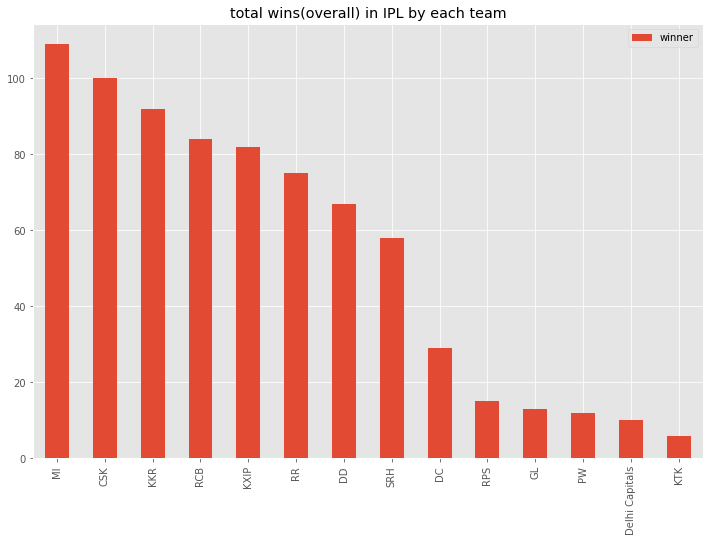

In [131]:
team_wins.plot(kind="bar", title="total wins(overall) in IPL by each team", figsize=(12,8))

### Winning both toss and match

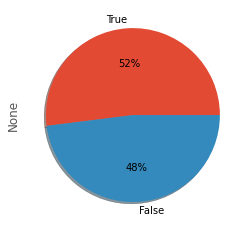

In [132]:
wins = match['toss_winner'] == match['winner']
ax= wins.value_counts().plot(kind='pie', autopct='%1.0f%%', shadow=True)

### Toss Decisions every season

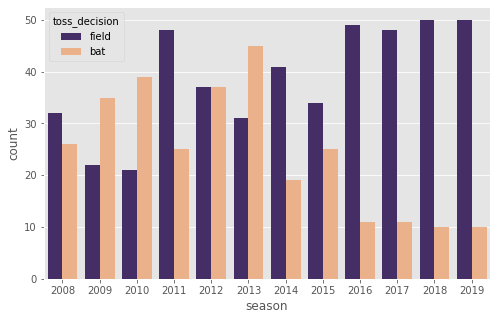

In [133]:
plt.subplots(figsize=(8,5))
sns.countplot(x="season",hue="toss_decision",data=match, palette=['#432370',"#FAAE7B"])
plt.show()

### TOSS WON BY EACH TEAM

Text(0.5, 1.0, 'Maximum Toss Won')

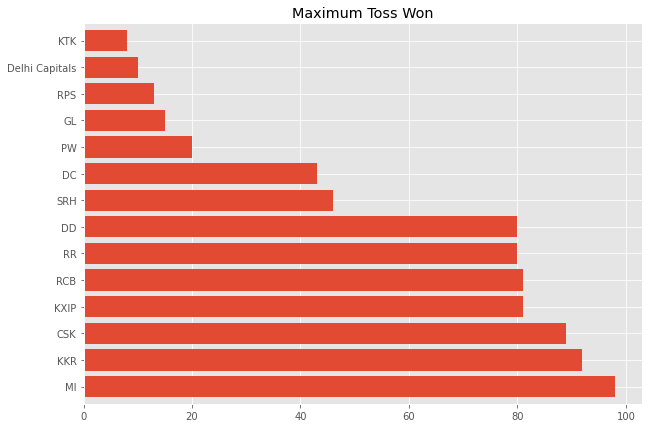

In [134]:
plt.subplots(figsize=(10,7))
ax = match['toss_winner'].value_counts().plot.barh(width=0.8)
plt.title("Maximum Toss Won")


### Best Team performers while batting first and second

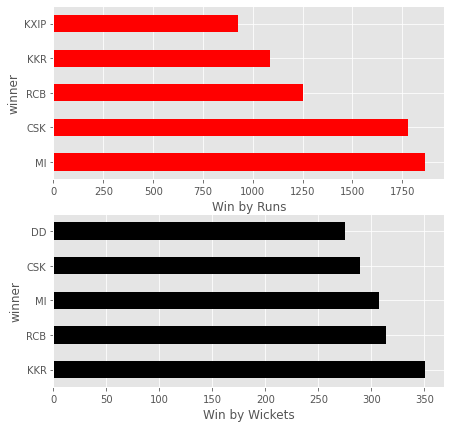

In [163]:
bat_first = match.groupby('winner')['win_by_runs'].sum().sort_values(
    ascending=False)
plt.figure(figsize=(7, 7))
ax1 = plt.subplot(2, 1, 1)
bat_first[:5].plot(kind="barh", ax=ax1, color="red")
ax1.set_xlabel('Win by Runs')


bat_second = match.groupby('winner')['win_by_wickets'].sum().sort_values(
    ascending=False)
ax2 = plt.subplot(2, 1, 2)
bat_second[:5].plot(kind="barh", ax=ax2, color="black")
ax2.set_xlabel('Win by Wickets')
plt.show()

### Top 20 Wicket Takers

In [135]:
#wickets taken by bowlers => caught,bowled,run out,lbw,stumped,caught and bowled,hit wicket
wk_taken=delivery[(delivery["dismissal_kind"] == 'caught') | (delivery["dismissal_kind"] == 'bowled') | (delivery["dismissal_kind"] == 'run out') | (delivery["dismissal_kind"] == 'lbw') | (delivery["dismissal_kind"] == 'stumped') | (delivery["dismissal_kind"] == 'caught and bowled') | (delivery["dismissal_kind"] == 'hit wicket')].groupby("bowler")['bowler'].count().sort_values(ascending = False)

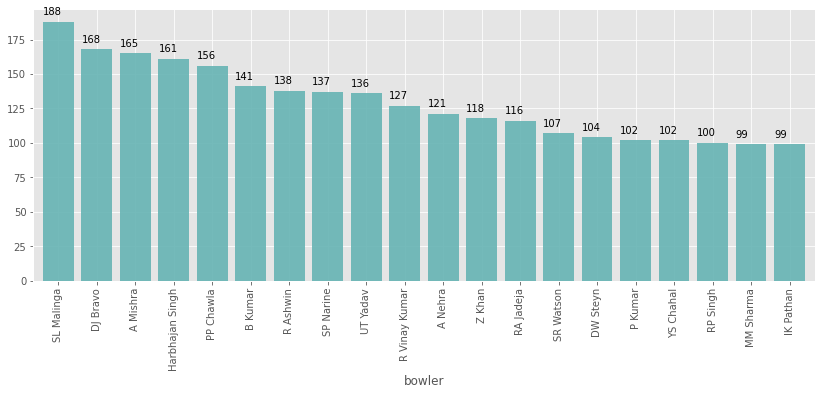

In [136]:
plt.figure(figsize=(14,5))
ax = wk_taken.head(20).plot.bar(width=0.8,color=(0.4,0.7,0.7,0.9))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.show()

### Batsman Summary Of 20 players

In [137]:
batsmen_summary = delivery.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen_summary.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen_summary = batsmen_summary.sort_values(['balls','runs'], ascending=False)
batsmen_summary.head(10)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3776,4632
G Gambhir,3524,4223
RV Uthappa,3492,4446
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3215,3850


In [138]:
batsmen_summary['batting_strike_rate'] = batsmen_summary['runs']/batsmen_summary['balls'] * 100
batsmen_summary['batting_strike_rate'] = batsmen_summary['batting_strike_rate'].round(2)
batsmen_summary.head(20)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


### Umpires for most no of matches

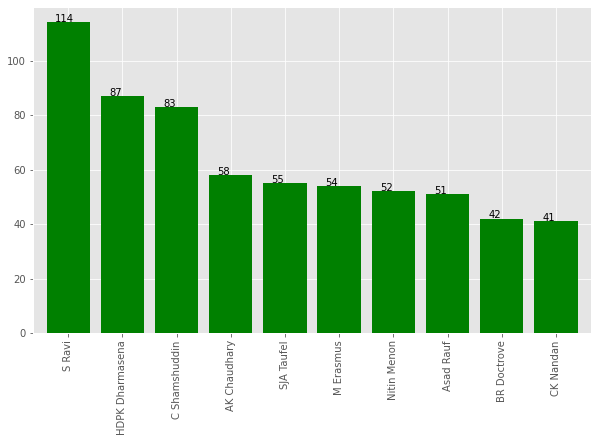

In [139]:
plt.subplots(figsize=(10,6))
ump=pd.concat([match['umpire1'],match['umpire2'], match['umpire3']]) 
ax14=ump.value_counts().head(10).plot.bar(width=0.8,color='green')
for p in ax14.patches:
    ax14.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Runs scored in powerplay by all teams(overall)

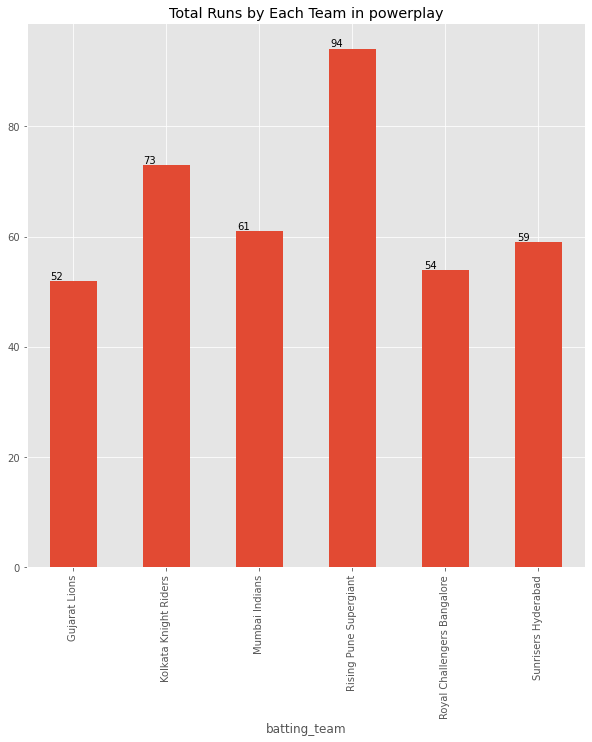

In [140]:

runs_per_team = deliveries_seasons[(deliveries_seasons["over"] <= 6)].groupby(deliveries_seasons["batting_team"])["total_runs"].sum()
ax = runs_per_team.plot(kind="bar", figsize=(10,10), title="Total Runs by Each Team in powerplay")
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Best Fielders

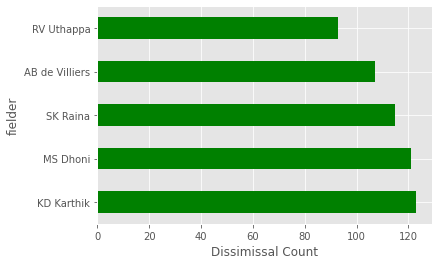

In [155]:
field_df = delivery.query(
    'dismissal_kind =="caught" | dismissal_kind =="run out" ')
fielders = field_df.groupby('fielder')['match_id'].count().sort_values(
    ascending=False)

#plotting top 5 fielders
fielders[:5].plot(kind="barh", color="green")
plt.xlabel('Dissimissal Count')
plt.show()

### Best Wicket Keepers

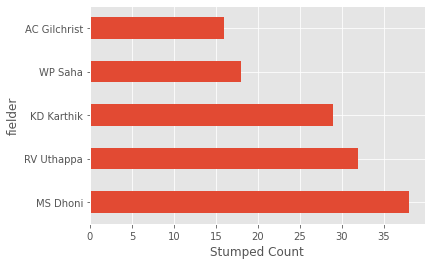

In [154]:
dismiss = delivery.query('dismissal_kind=="stumped"')
wicket_keeper = dismiss.groupby('fielder')['match_id'].count().sort_values(
    ascending=False)

#plotting top 5 wicket keeper
wicket_keeper[:5].plot(kind="barh")
plt.xlabel('Stumped Count')
plt.show()

### Most No. of Sixes by a player

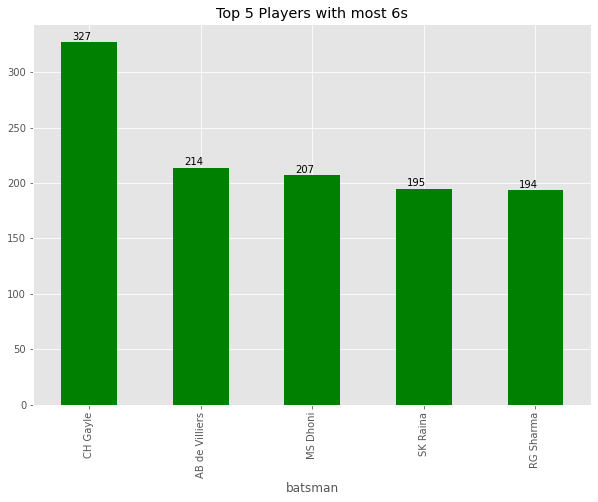

In [161]:
ax=delivery[delivery["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(5).plot(kind="bar", title="Top 5 Players with most 6s", figsize=(10,7), color="green")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.show()

### Most no of 4 by a player

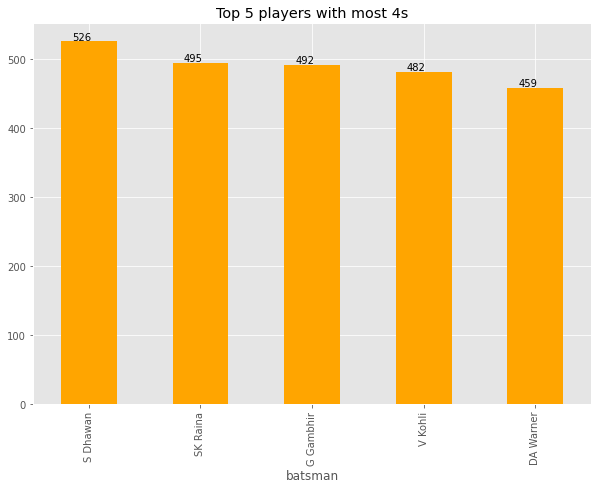

In [160]:
ax=delivery[delivery["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(5).plot(kind="bar", title="Top 5 players with most 4s", figsize=(10,7), color="orange")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.show()

# SUMMARY

* S. Ravi and Dharamasena are the two people as umpire for the most no of ipl matches.
* KD Kartik, MS Dhoni are the top two fielders.
* Dhoni and Uttappa are top two wicket keepers.
* Virat kohli , Suresh raina, Rohit Sharma are the top 3 Run-scorers. 
* The above all top players company can endorse for its products.

# References

* https://www.kaggle.com/lalitharajesh/ipl-eda-analysis
* https://ravijagtap.medium.com/ipl-exploratory-data-analysis-f545d5e725c7